# Observed Trends

* Temperature rises the closer we get to the equator
* The northern hemisphere is generally more humid than the southern hemisphere
* Latitude does not affect cloudiness but there are clusters of 0, 40, 80 and 100% cloudiness in the southern hemisphere
* Wind speed rises the farther we get from the equator, though there appears to be more cities with higher wind speed in the southern hemisphere

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [109]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [110]:
# Setting lists to hold city data
long = []
lat = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
city_list = []

# Initialising set and record counters
set_counter = 1
record_counter = 1

# Print information on retrieved data
print("Beginning Data Retrieval")
print("-----------------------------")
for index, city in enumerate(cities):
    
    # Count records in sets of 50
    if (index % 50 == 0 and index >= 50):
        set_counter += 1
        record_counter = 1
    
    # Retrieve weather data and add to city data lists
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial&q=" + city
        weather_response = requests.get(url).json()
        city_list.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
        record_counter += 1
   
    # Handle exceptions for missing cities    
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | rikitea
City not found. Skipping...
Processing Record 3 of Set 1 | haines junction
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | poronaysk
Processing Record 11 of Set 1 | touros
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kapaa
City not found. Skipping...
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | karaman
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | cayenne
P

In [111]:
# Create city list data frame and save to csv
city_data = pd.DataFrame({"City": city_list, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Latitude": lat, "Longitude": long, "Max Temp": max_temp, "Wind Speed": wind_speed})
city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

# Show number of data records
city_data.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Latitude      564
Longitude     564
Max Temp      564
Wind Speed    564
dtype: int64

In [112]:
# Print dataframe
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Alice Springs,0,AU,1587234135,55,-23.70,133.88,60.80,4.70
1,Rikitea,1,PF,1587234135,70,-23.12,-134.97,76.78,4.68
2,Haines Junction,1,CA,1587234136,50,60.75,-137.51,42.53,1.50
3,Ribeira Grande,75,PT,1587234136,88,38.52,-28.70,64.40,9.17
4,Hobart,40,AU,1587234136,87,-42.88,147.33,45.00,1.12


##### Through a random selection of a wide range of geographic coordinates (longitude and latitude values), using citipy library to get city names and OpenWeather API to get city temperatures, the scatter plots below are used to visualise... 

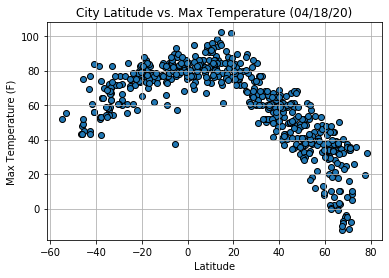

In [113]:
# Retrieve current date
date = datetime.datetime.now().strftime("%x")

# Create scatter plot of latitude against maximum temperature with labels
plt.scatter(city_data["Latitude"], city_data["Max Temp"], edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save plot image
plt.savefig("Images/CityLatMaxTemp.png")
plt.show()

The distribution of the maximum temperatures, in Fahrenheits, of cities across all latitudes

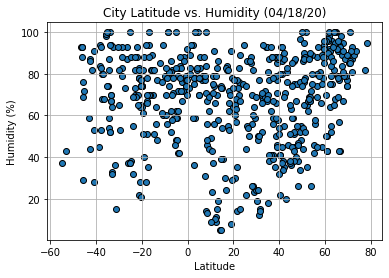

In [114]:
# Create scatter plot of latitude against humidity with labels
plt.scatter(city_data["Latitude"], city_data["Humidity"], edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot image
plt.savefig("Images/CityLatHumidity.png")
plt.show()

The humidity levels, in percentages, of cities across all latitudes

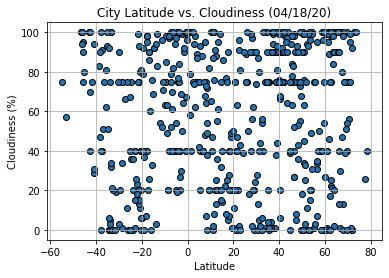

In [115]:
# Create scatter plot of latitude against cloudiness with labels
plt.scatter(city_data["Latitude"], city_data["Cloudiness"], edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot image
plt.savefig("Images/CityLatCloudiness.png")
plt.show()

The cloudiness, in percentages, of cities across all latitudes

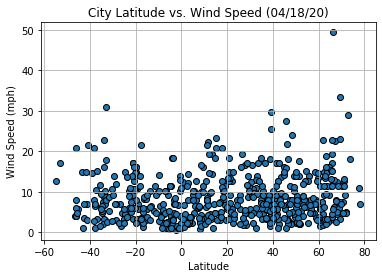

In [116]:
# Create scatter plot of latitude against wind speed with labels
plt.scatter(city_data["Latitude"], city_data["Wind Speed"], edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot image
plt.savefig("Images/CityLatWindSpeed.png")
plt.show()

The wind speed, in miles per hour, of cities across all latitudes

In [117]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = city_data.loc[city_data["Latitude"] >= 0]
northern_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
2,Haines Junction,1,CA,1587234136,50,60.75,-137.51,42.53,1.50
3,Ribeira Grande,75,PT,1587234136,88,38.52,-28.70,64.40,9.17
5,Pacific Grove,90,US,1587234111,62,36.62,-121.92,59.00,7.99
6,Qaqortoq,40,GL,1587234136,43,60.72,-46.03,33.80,5.82
7,Tiksi,92,RU,1587233851,87,71.69,128.87,5.04,4.70


In [118]:
# Show southern hemisphere dataframe
southern_data = city_data.loc[city_data["Latitude"] < 0]
southern_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Alice Springs,0,AU,1587234135,55,-23.70,133.88,60.80,4.70
1,Rikitea,1,PF,1587234135,70,-23.12,-134.97,76.78,4.68
4,Hobart,40,AU,1587234136,87,-42.88,147.33,45.00,1.12
10,Touros,40,BR,1587234136,62,-5.20,-35.46,87.80,11.41
11,Ushuaia,75,AR,1587234136,37,-54.80,-68.30,51.80,12.75


In [119]:
# Create a function to create Linear Regression plots
def regression(x, y, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = (slope * x) + intercept
    plt.plot(x,regress_values,"r")
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(line_eq, coordinates, fontsize=15, color="r")
    print(f"The r-squared is: {rvalue}")
    return

### Northern and Souther Hemisphere scatter plots showing that...

The r-squared is: -0.8828956642447631


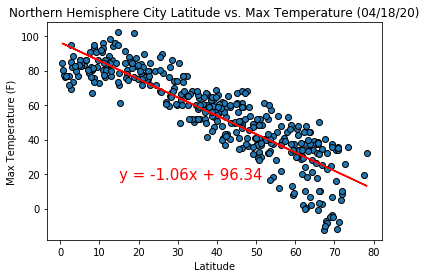

In [120]:
# Create scatter plot of northern hemisphere cities against maximum temperature with linear regression model
plt.scatter(northern_data["Latitude"], northern_data["Max Temp"], edgecolors = "black")
regression(northern_data["Latitude"], northern_data["Max Temp"],(15,17))
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save plot image
plt.savefig("Images/NorthHemiMaxTemp.png")
plt.show()

The r-squared is: 0.6817546107656175


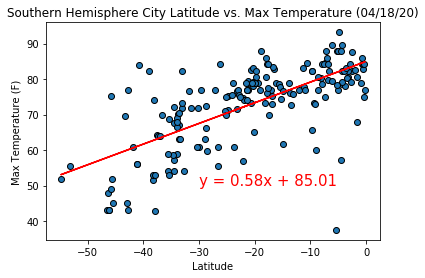

In [121]:
# Create scatter plot of southern hemisphere cities against maximum temperature with linear regression model
plt.scatter(southern_data["Latitude"], southern_data["Max Temp"], edgecolors = "black")
regression(southern_data["Latitude"], southern_data["Max Temp"],(-30,50))
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save plot image
plt.savefig("Images/SouthHemiMaxTemp.png")
plt.show()

...Temperature rises the closer we get to the equator

The r-squared is: 0.2931631945815434


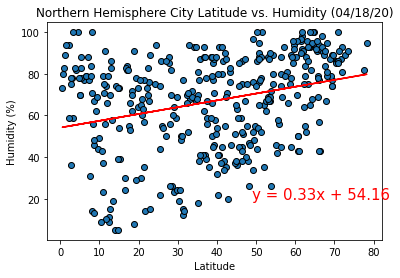

In [122]:
# Create scatter plot of northern hemisphere cities against humidity with linear regression model
plt.scatter(northern_data["Latitude"], northern_data["Humidity"], edgecolors = "black")
regression(northern_data["Latitude"], northern_data["Humidity"], (49,20))
plt.title("Northern Hemisphere City Latitude vs. Humidity (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot image
plt.savefig("Images/NorthHemiHumidity.png")
plt.show()

The r-squared is: 0.05033299586501237


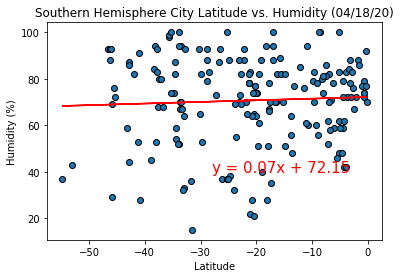

In [123]:
# Create scatter plot of southern hemisphere cities against humidity with linear regression model
plt.scatter(southern_data["Latitude"], southern_data["Humidity"], edgecolors = "black")
regression(southern_data["Latitude"], southern_data["Humidity"],(-28,40))
plt.title("Southern Hemisphere City Latitude vs. Humidity (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save plot image
plt.savefig("Images/SouthHemiHumidity.png")
plt.show()

...The northern hemisphere is generally more humid than the southern hemisphere

The r-squared is: 0.06983581241501298


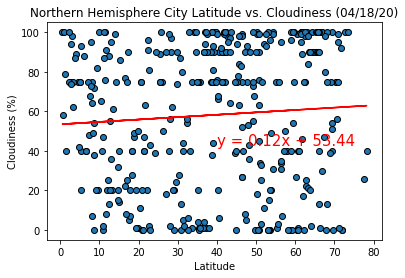

In [124]:
# Create scatter plot of northern hemisphere cities against cloudiness with linear regression model
plt.scatter(northern_data["Latitude"], northern_data["Cloudiness"], edgecolors = "black")
regression(northern_data["Latitude"], northern_data["Cloudiness"],(40,43))
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot image
plt.savefig("Images/NorthHemiCloudiness.png")
plt.show()

The r-squared is: 0.09866576436514256


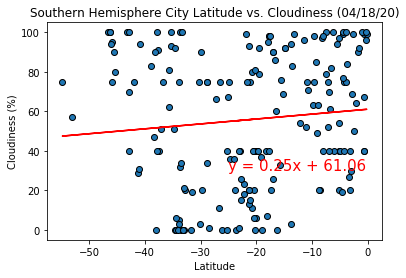

In [125]:
# Create scatter plot of southern hemisphere cities against cloudiness with linear regression model
plt.scatter(southern_data["Latitude"], southern_data["Cloudiness"], edgecolors = "black")
regression(southern_data["Latitude"], southern_data["Cloudiness"],(-25,30))
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save plot image
plt.savefig("Images/SouthHemiCloudiness.png")
plt.show()

...Latitude does not affect cloudiness but there are clusters of 0, 40, 80 and 100% cloudiness in the southern hemisphere

The r-squared is: 0.11728952154180546


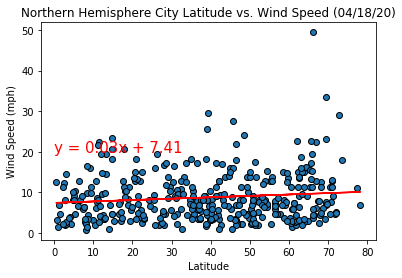

In [126]:
# Create scatter plot of northern hemisphere cities against wind speed with linear regression model
plt.scatter(northern_data["Latitude"], northern_data["Wind Speed"], edgecolors = "black")
regression(northern_data["Latitude"], northern_data["Wind Speed"], (0, 20))
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot image
plt.savefig("Images/NorthHemiWindSpeed.png")
plt.show()

The r-squared is: -0.19341684948655077


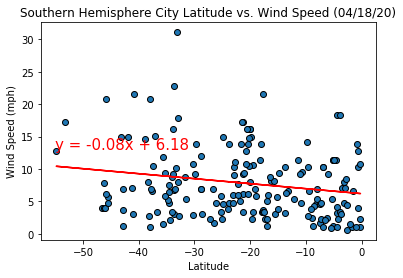

In [127]:
# Create scatter plot of southern hemisphere cities against wind speed with linear regression model
plt.scatter(southern_data["Latitude"], southern_data["Wind Speed"], edgecolors = "black")
regression(southern_data["Latitude"], southern_data["Wind Speed"],(-55,13))
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save plot image
plt.savefig("Images/SouthHemiWindSpeed.png")
plt.show()

...Wind speed rises the farther we get from the equator, though there appears to be more cities with higher wind speed in the southern hemisphere